<a href="https://colab.research.google.com/github/deep-astaad/big-data-analytics/blob/main/Song_views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [10]:
# !pip install pyspark

In [8]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("views").getOrCreate()

# read the CSV file
df = spark.read.csv("/content/Spotify_Youtube.csv", header=True, inferSchema=True)

In [11]:
df = df.drop("Url_spotify", "Uri", "Url_youtube", "Title", "Url_spotify", "Uri", "Url_youtube", "Title", "official_video", "Licensed", "Description", "Comments", "Stream",  "_c0")

In [12]:
df = df.filter((df.Artist.isNotNull()) & (df.Artist != "True"))

In [13]:
# remove duplicate rows from the DataFrame
df = df.dropDuplicates()

In [14]:
df = df.filter((df.Views.isNotNull()))

In [15]:
df.show()

+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|         Artist|               Track|               Album|Album_type|Danceability|Energy| Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|             Channel|       Views|     Likes|
+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|        50 Cent|          In Da Club|Get Rich Or Die T...|     album|       0.902|  0.72| 6.0|  -2.776|      0.347|        0.26|             0.0|  0.0749|  0.805| 90.059|   193467.0|          50CentVEVO|1682616458.0|10481678.0|
|      Radiohead|Jigsaw Falling In...|         In Rainbows|     album|       0.462| 

In [16]:
pd.DataFrame(df.take(10), columns=df.columns)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes
0,50 Cent,In Da Club,Get Rich Or Die Tryin',album,0.902,0.72,6.0,-2.776,0.347,0.26,0.0,0.0749,0.805,90.059,193467.0,50CentVEVO,1682616458.0,10481678.0
1,Radiohead,Jigsaw Falling Into Place,In Rainbows,album,0.462,0.832,11.0,-6.085,0.0479,0.108,0.00416,0.0741,0.807,165.653,248893.0,Radiohead,26398730.0,180969.0
2,Mariah Carey,Obsessed,Memoirs of an imperfect Angel,album,0.742,0.468,10.0,-5.557,0.0625,0.0465,0.0,0.826,0.369,86.443,242200.0,MariahCareyVEVO,204281507.0,1613939.0
3,Alejandro Sanz,La fuerza del corazón,Alejandro Sanz 3,album,0.399,0.53,10.0,-7.176,0.0532,0.479,1.36e-06,0.0719,0.351,76.827,307053.0,Warner Music México,59341295.0,181862.0
4,Nelly Furtado,Maneater,Loose,album,0.796,0.777,6.0,-4.81,0.0397,0.0261,0.000358,0.121,0.787,132.722,258893.0,NellyFurtadoVEVO,114726796.0,591814.0
5,Joan Sebastian,Que Sea,Que Sea,single,0.781,0.693,0.0,-3.558,0.0308,0.701,4.45e-06,0.156,0.939,97.074,170507.0,JoanSebastianVEVO,64304761.0,302167.0
6,Lata Mangeshkar,Dil To Pagal Hai,Dil To Pagal Hai,album,0.752,0.67,6.0,-10.641,0.0465,0.306,0.000528,0.729,0.748,110.696,336118.0,YRF,207080018.0,665567.0
7,Black Sabbath,Sweet Leaf - 2014 Remaster,Master of Reality (2014 Remaster),album,0.362,0.6,2.0,-12.285,0.0463,0.00183,0.0426,0.0814,0.658,148.462,304787.0,GangstaLink,1648686.0,12407.0
8,Rod Stewart,The First Cut Is the Deepest,A Night on the Town,album,0.546,0.627,0.0,-9.037,0.0244,0.316,0.00114,0.096,0.764,81.278,271200.0,Rod Stewart,6443015.0,48603.0
9,Gwen Stefani,What You Waiting For?,Love Angel Music Baby (Deluxe Version),album,0.676,0.948,5.0,-2.557,0.0628,0.0509,8.19e-06,0.384,0.731,136.027,221227.0,GwenStefaniVEVO,63710019.0,393348.0


In [17]:
from pyspark.sql.functions import when

# create a new DataFrame with the Album_type column transformed
df = df.withColumn("Album_type", when((df.Album_type != "single") & (df.Album_type != "album"), "single").otherwise(df.Album_type))

# show the new DataFrame
df.show()

+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|         Artist|               Track|               Album|Album_type|Danceability|Energy| Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|             Channel|       Views|     Likes|
+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|        50 Cent|          In Da Club|Get Rich Or Die T...|     album|       0.902|  0.72| 6.0|  -2.776|      0.347|        0.26|             0.0|  0.0749|  0.805| 90.059|   193467.0|          50CentVEVO|1682616458.0|10481678.0|
|      Radiohead|Jigsaw Falling In...|         In Rainbows|     album|       0.462| 

In [18]:
import matplotlib.pyplot as plt

In [19]:
df.printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Track: string (nullable = true)
 |-- Album: string (nullable = true)
 |-- Album_type: string (nullable = true)
 |-- Danceability: string (nullable = true)
 |-- Energy: string (nullable = true)
 |-- Key: string (nullable = true)
 |-- Loudness: string (nullable = true)
 |-- Speechiness: string (nullable = true)
 |-- Acousticness: string (nullable = true)
 |-- Instrumentalness: string (nullable = true)
 |-- Liveness: string (nullable = true)
 |-- Valence: string (nullable = true)
 |-- Tempo: string (nullable = true)
 |-- Duration_ms: string (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Views: string (nullable = true)
 |-- Likes: string (nullable = true)



In [20]:
from pyspark.sql.functions import col

# filter the DataFrame to get the "Despacito" song
despacito = df.filter(col("Track") == "Despacito")

# show the resulting DataFrame
despacito.show()

+------------+---------+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-------+-----------+-------------+------------+----------+
|      Artist|    Track|Album|Album_type|Danceability|Energy|Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|      Channel|       Views|     Likes|
+------------+---------+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-------+-----------+-------------+------------+----------+
|  Luis Fonsi|Despacito| VIDA|     album|       0.655| 0.797|2.0|  -4.787|      0.153|       0.198|             0.0|   0.067|  0.839|177.928|   229360.0|LuisFonsiVEVO|8079649362.0|50788652.0|
|Daddy Yankee|Despacito| VIDA|     album|       0.655| 0.797|2.0|  -4.787|      0.153|       0.198|             0.0|   0.067|  0.839|177.928|   229360.0|LuisFonsiVEVO|8079646911.0|50788626.0|
+------------+---------+-----+----------

In [21]:
from pyspark.sql.functions import col

# list of column names to convert
cols_to_convert = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Likes', 'Views']

# convert each column to double data type
for col_name in cols_to_convert:
    df = df.withColumn(col_name, col(col_name).cast("double"))

In [22]:
df.printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Track: string (nullable = true)
 |-- Album: string (nullable = true)
 |-- Album_type: string (nullable = true)
 |-- Danceability: double (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Key: double (nullable = true)
 |-- Loudness: double (nullable = true)
 |-- Speechiness: double (nullable = true)
 |-- Acousticness: double (nullable = true)
 |-- Instrumentalness: double (nullable = true)
 |-- Liveness: double (nullable = true)
 |-- Valence: double (nullable = true)
 |-- Tempo: double (nullable = true)
 |-- Duration_ms: double (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Views: double (nullable = true)
 |-- Likes: double (nullable = true)



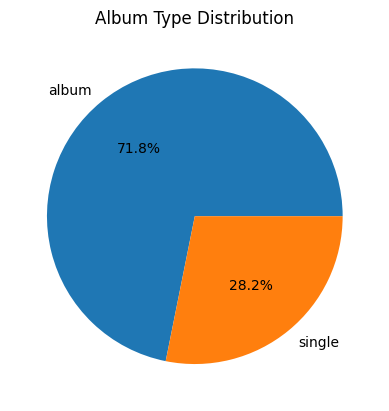

In [23]:
# group by Album_type and count the number of occurrences
album_type_counts = df.groupBy("Album_type").count().collect()

# create a list of labels and values for the pie chart
labels = [row["Album_type"] for row in album_type_counts]
values = [row["count"] for row in album_type_counts]

# plot the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Album Type Distribution")
plt.show()

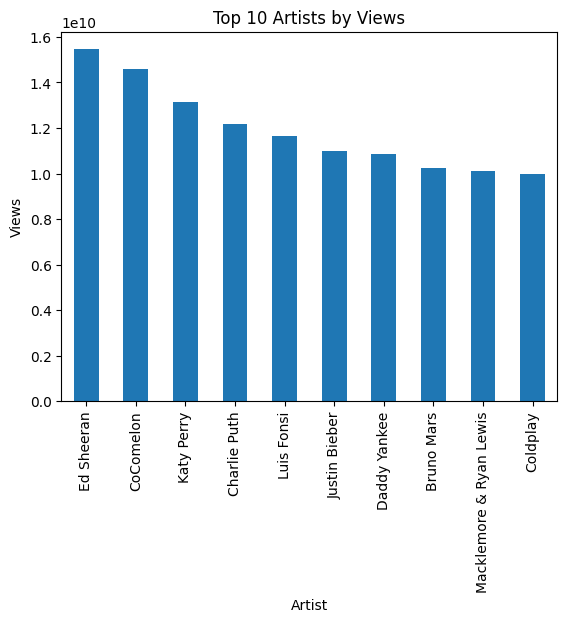

In [24]:
# group the DataFrame by artist, aggregate the views, and select the top 10 rows
top_10_artists_by_views = df.groupBy("Artist").agg({"Views": "sum"}).orderBy("sum(Views)", ascending=False).limit(10)

# convert the PySpark DataFrame to a Pandas DataFrame and create a bar plot
pandas_df = top_10_artists_by_views.toPandas()
pandas_df.plot(kind="bar", x="Artist", y="sum(Views)", legend=False)

# set the title and axis labels
plt.title("Top 10 Artists by Views")
plt.xlabel("Artist")
plt.ylabel("Views")

# display the plot
plt.show()

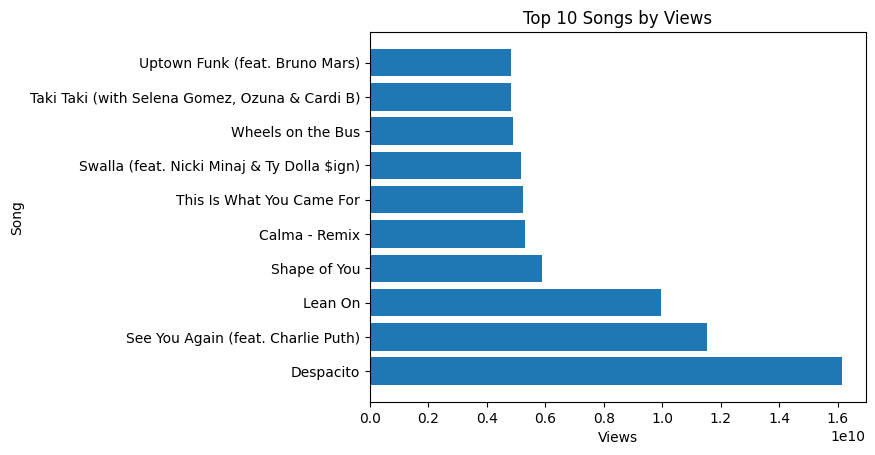

In [25]:
from pyspark.sql.functions import sum, desc

# group by the "Track" column and compute the sum of views
songs = df.groupBy("Track").agg(sum("Views").alias("TotalViews"))

# sort the DataFrame in descending order of views and take the top 10 rows
top_songs = songs.sort(desc("TotalViews")).limit(10)

# extract the song names and views as lists
song_names = top_songs.select("Track").rdd.flatMap(lambda x: x).collect()
views = top_songs.select("TotalViews").rdd.flatMap(lambda x: x).collect()

# plot the bar chart
plt.barh(song_names, views)
plt.xlabel("Views")
plt.ylabel("Song")
plt.title("Top 10 Songs by Views")
plt.show()

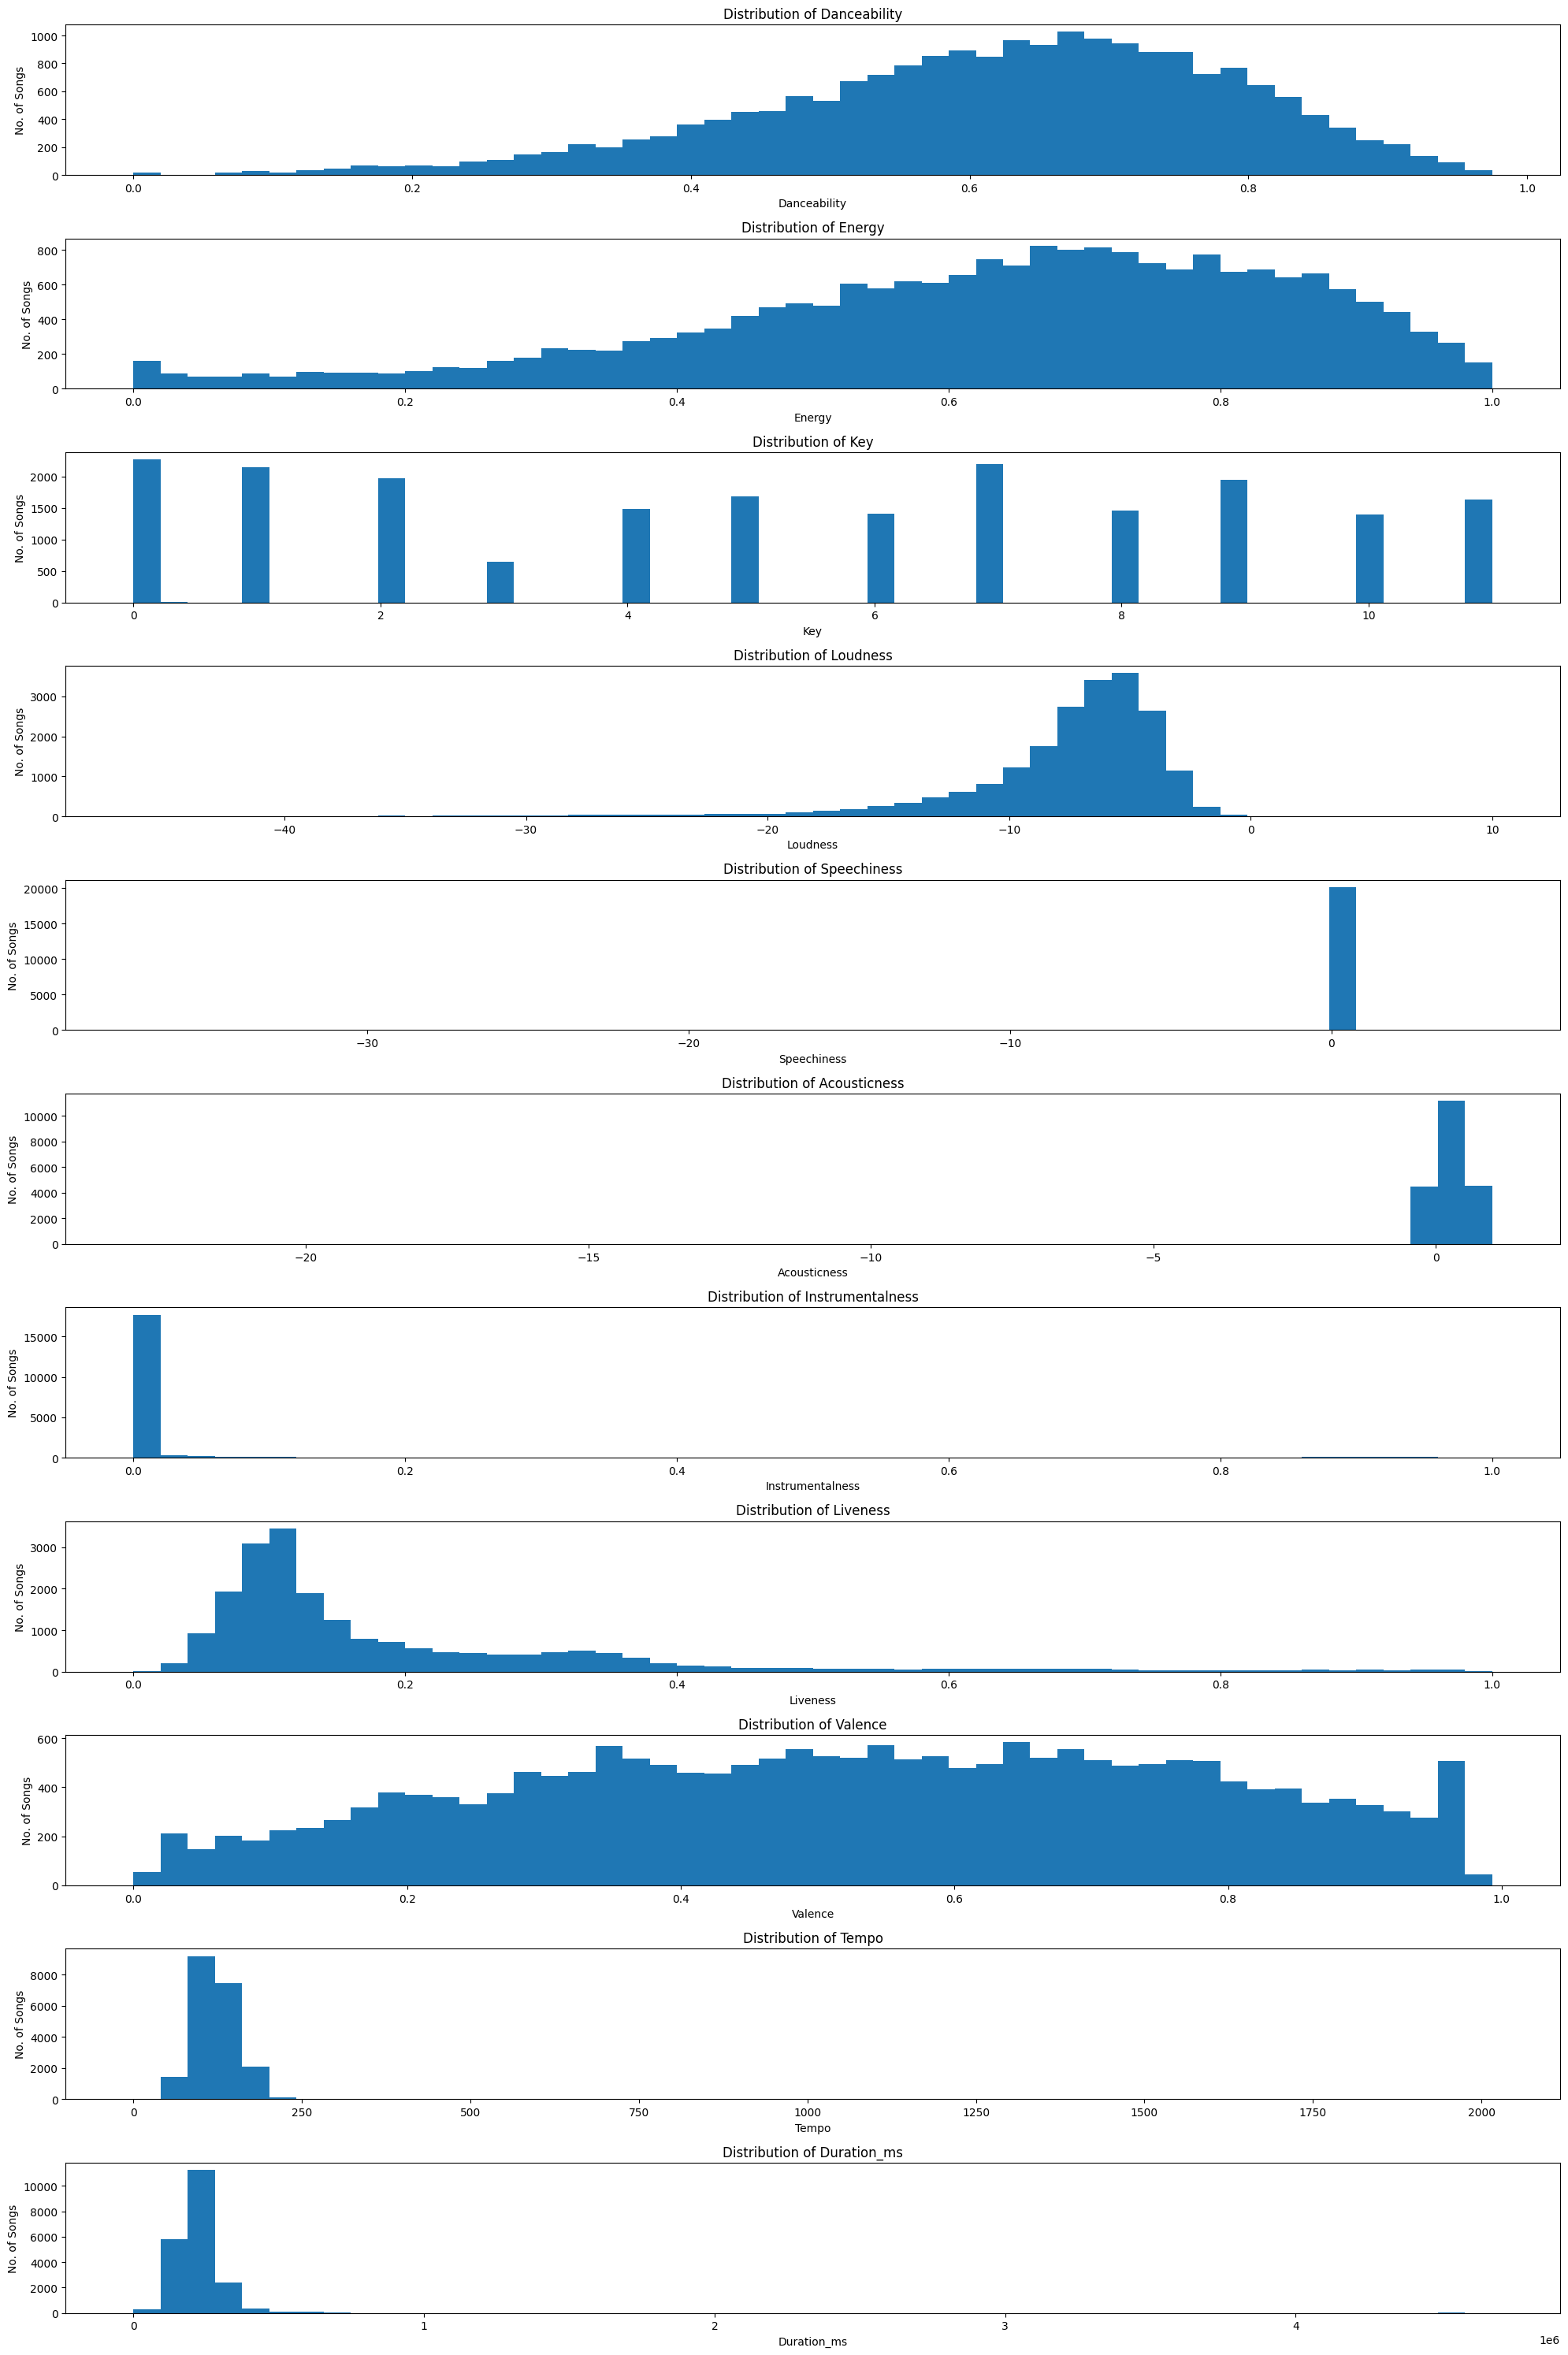

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# define the list of columns to plot
cols_to_plot = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

# set up the subplots
fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(20, 30))

# loop over the columns and plot a histogram for each one
for i, col in enumerate(cols_to_plot):
    # get the values of the column and remove any null values
    values = df.select(col).na.drop().rdd.flatMap(lambda x: x).collect()
    
    # plot the histogram
    axes[i].hist(values, bins=50)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("No. of Songs")
    axes[i].set_title("Distribution of " + col)

# adjust the spacing between the subplots
plt.tight_layout()

# show the plot
plt.show()